<a href="https://colab.research.google.com/github/ilyayath/olist-analysis/blob/main/EDA_olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set(style="whitegrid")
pio.templates.default = "plotly_white"

In [2]:
df = pd.read_csv("/content/df.csv")

In [3]:
df.describe()

,price,freight_value,review_score,payment_value
count,115723.000000,115723.00000,114862.000000,115720.000000
mean,119.911096,19.98140,4.080488,171.810794
std,182.670252,15.71829,1.347659,265.642619
min,0.850000,0.00000,1.000000,0.000000
25%,39.900000,13.08000,4.000000,60.850000
50%,74.900000,16.28000,5.000000,108.110000
75%,132.900000,21.16000,5.000000,188.940000
max,6735.000000,409.68000,5.000000,13664.080000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115723 entries, 0 to 115722
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115723 non-null  object 
 1   order_purchase_timestamp       115723 non-null  object 
 2   order_status                   115723 non-null  object 
 3   customer_id                    115723 non-null  object 
 4   customer_state                 115723 non-null  object 
 5   product_category_name          114085 non-null  object 
 6   product_category_name_english  114062 non-null  object 
 7   product_id                     115723 non-null  object 
 8   price                          115723 non-null  float64
 9   freight_value                  115723 non-null  float64
 10  review_score                   114862 non-null  float64
 11  payment_type                   115720 non-null  object 
 12  payment_value                 

In [5]:
df.shape

(115723, 13)

In [6]:
df.isnull().sum()

,0
order_id,0
order_purchase_timestamp,0
order_status,0
customer_id,0
customer_state,0
product_category_name,1638
product_category_name_english,1661
product_id,0
price,0
freight_value,0


In [7]:
df.duplicated().sum()

np.int64(11428)

In [8]:
df[df.duplicated()]

,order_id,order_purchase_timestamp,order_status,customer_id,customer_state,product_category_name,product_category_name_english,product_id,price,freight_value,review_score,payment_type,payment_value
4,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:44,delivered,d987da9fb4086ab7c2c0f83963cd6722,SP,beleza_saude,health_beauty,e67307ff0f15ade43fcb6e670be7a74c,18.99,7.78,1.0,credit_card,53.54
31,002c9def9c9b951b1bec6d50753c9891,2018-05-14 16:57:47,delivered,06cf02bf583b05fd91bc8eec0f1b4c3f,SP,utilidades_domesticas,housewares,2d9ff06c8870a518f5f6909774e140fb,78.00,8.90,4.0,credit_card,173.80
41,003324c70b19a16798817b2b3640e721,2017-05-18 19:04:48,delivered,43696894b5bf8fbe1a40b2148ea505a0,MG,malas_acessorios,luggage_accessories,2b939dc9b176d7fa21594d588815d4a4,102.90,14.45,1.0,credit_card,234.70
44,005059edee63c8c708ba61910793b31b,2018-02-05 18:25:51,delivered,d3b3960bebb0ff8c6edb75c8edd39212,RJ,cama_mesa_banho,bed_bath_table,84f456958365164420cfc80fbe4c7fab,92.00,17.89,3.0,credit_card,219.78
46,00526a9d4ebde463baee25f386963ddc,2018-08-07 22:03:44,delivered,5848ef3f994e18c5121d291e0daedc81,SP,alimentos,food,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,8.40,1.0,credit_card,169.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115697,ffb18bf111fa70edf316eb0390427986,2017-11-27 13:29:05,delivered,5c8f393ae866c2a2d2e775dbc2409a59,GO,informatica_acessorios,computers_accessories,599dc392f7a23273471b068d72408224,235.00,19.30,5.0,credit_card,617.24
115699,ffb2c3a5bb149a2f860e5d057096201f,2018-05-03 20:12:46,delivered,de58a2005b3c3a659af894c10d046399,MG,cama_mesa_banho,bed_bath_table,683647534fe73616ae97d91a6ef253f4,55.00,22.97,5.0,credit_card,311.88
115700,ffb2c3a5bb149a2f860e5d057096201f,2018-05-03 20:12:46,delivered,de58a2005b3c3a659af894c10d046399,MG,cama_mesa_banho,bed_bath_table,683647534fe73616ae97d91a6ef253f4,55.00,22.97,5.0,credit_card,311.88
115701,ffb2c3a5bb149a2f860e5d057096201f,2018-05-03 20:12:46,delivered,de58a2005b3c3a659af894c10d046399,MG,cama_mesa_banho,bed_bath_table,683647534fe73616ae97d91a6ef253f4,55.00,22.97,5.0,credit_card,311.88


In [9]:
df[df.duplicated(subset=['order_id', 'product_id', 'price','order_purchase_timestamp'])]

,order_id,order_purchase_timestamp,order_status,customer_id,customer_state,product_category_name,product_category_name_english,product_id,price,freight_value,review_score,payment_type,payment_value
4,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:44,delivered,d987da9fb4086ab7c2c0f83963cd6722,SP,beleza_saude,health_beauty,e67307ff0f15ade43fcb6e670be7a74c,18.99,7.78,1.0,credit_card,53.54
31,002c9def9c9b951b1bec6d50753c9891,2018-05-14 16:57:47,delivered,06cf02bf583b05fd91bc8eec0f1b4c3f,SP,utilidades_domesticas,housewares,2d9ff06c8870a518f5f6909774e140fb,78.00,8.90,4.0,credit_card,173.80
41,003324c70b19a16798817b2b3640e721,2017-05-18 19:04:48,delivered,43696894b5bf8fbe1a40b2148ea505a0,MG,malas_acessorios,luggage_accessories,2b939dc9b176d7fa21594d588815d4a4,102.90,14.45,1.0,credit_card,234.70
44,005059edee63c8c708ba61910793b31b,2018-02-05 18:25:51,delivered,d3b3960bebb0ff8c6edb75c8edd39212,RJ,cama_mesa_banho,bed_bath_table,84f456958365164420cfc80fbe4c7fab,92.00,17.89,3.0,credit_card,219.78
46,00526a9d4ebde463baee25f386963ddc,2018-08-07 22:03:44,delivered,5848ef3f994e18c5121d291e0daedc81,SP,alimentos,food,0c4a0f8ab44f9acd2d04e7024f9ba362,33.89,8.40,1.0,credit_card,169.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115697,ffb18bf111fa70edf316eb0390427986,2017-11-27 13:29:05,delivered,5c8f393ae866c2a2d2e775dbc2409a59,GO,informatica_acessorios,computers_accessories,599dc392f7a23273471b068d72408224,235.00,19.30,5.0,credit_card,617.24
115699,ffb2c3a5bb149a2f860e5d057096201f,2018-05-03 20:12:46,delivered,de58a2005b3c3a659af894c10d046399,MG,cama_mesa_banho,bed_bath_table,683647534fe73616ae97d91a6ef253f4,55.00,22.97,5.0,credit_card,311.88
115700,ffb2c3a5bb149a2f860e5d057096201f,2018-05-03 20:12:46,delivered,de58a2005b3c3a659af894c10d046399,MG,cama_mesa_banho,bed_bath_table,683647534fe73616ae97d91a6ef253f4,55.00,22.97,5.0,credit_card,311.88
115701,ffb2c3a5bb149a2f860e5d057096201f,2018-05-03 20:12:46,delivered,de58a2005b3c3a659af894c10d046399,MG,cama_mesa_banho,bed_bath_table,683647534fe73616ae97d91a6ef253f4,55.00,22.97,5.0,credit_card,311.88


In [10]:
df = df.drop_duplicates(subset=['order_id', 'product_id', 'price', 'order_purchase_timestamp'])

In [11]:
df

,order_id,order_purchase_timestamp,order_status,customer_id,customer_state,product_category_name,product_category_name_english,product_id,price,freight_value,review_score,payment_type,payment_value
0,001ac194d4a326a6fa99b581e9a3d963,2018-07-04 11:39:11,delivered,f4f17ada91ef010cbde3892ae54e625f,SP,construcao_ferramentas_construcao,construction_tools_construction,dbaee28f4ee64465838a229582d77520,54.00,8.54,5.0,boleto,62.54
1,001b76dd48a5b1eee3e87778daa40df8,2018-03-26 17:42:53,delivered,a62843b08086d1629415a203a7fd419d,SP,informatica_acessorios,computers_accessories,dbb67791e405873b259e4656bf971246,81.99,13.01,5.0,credit_card,95.00
2,001c85b5f68d2be0cb0797afc9e8ce9a,2017-11-24 19:19:18,delivered,48ed31e735f1c420ed6ca3637b7c744d,SP,cama_mesa_banho,bed_bath_table,84f456958365164420cfc80fbe4c7fab,99.00,13.71,2.0,credit_card,112.71
3,001d8f0e34a38c37f7dba2a37d4eba8b,2017-05-14 17:19:44,delivered,d987da9fb4086ab7c2c0f83963cd6722,SP,beleza_saude,health_beauty,e67307ff0f15ade43fcb6e670be7a74c,18.99,7.78,1.0,credit_card,53.54
5,001daeb0eddc45b999bad0801ad9d273,2017-05-17 23:19:34,delivered,3ba02060e681d361d603d5f7ef0a730b,BA,pet_shop,pet_shop,30c01cc81c9eb80469371743813789cc,38.33,16.79,5.0,boleto,55.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115718,ffbcbeeac5c9c9495cd729f896bc1d5f,2018-06-20 21:14:59,delivered,d3ce540a0fc7b47d22fc5951ccdd8914,SP,cama_mesa_banho,bed_bath_table,bf348f19164cdedd0ae1cf7b1d72fede,82.80,14.89,4.0,credit_card,97.69
115719,ffbcdac3da2c2f23b699666818b0d38c,2018-06-19 18:38:34,delivered,fe67d071eefb7f48949cbe89515cd672,RS,relogios_presentes,watches_gifts,cce55549bb816a12eba7ddfd637a961d,78.00,18.65,2.0,credit_card,96.65
115720,ffbe8a51afd59fa93224d1c6bc987aee,2017-11-02 16:31:52,delivered,a6195f49275f8f8b2e54557531722145,MG,papelaria,stationery,5c8d8bd9771a2391092e1fbba43debeb,169.90,15.95,5.0,credit_card,185.85
115721,ffbf2682f6e33c8cbac96e6862a95920,2017-12-27 00:27:04,delivered,3df48329a6d0a58fce24958eb175d12a,MG,moveis_decoracao,furniture_decor,2078312a2dcf1fcd8a38eabcf5dd033a,49.90,14.10,5.0,boleto,64.00


In [12]:
df["order_purchase_timestamp"].dtype

dtype('O')

In [13]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

In [14]:
df['price'].describe()

,price
count,100196.000000
mean,123.751681
std,187.654634
min,0.850000
25%,40.000000
50%,78.000000
75%,139.000000
max,6735.000000


In [15]:
df[df["price"] <= 0]

,order_id,order_purchase_timestamp,order_status,customer_id,customer_state,product_category_name,product_category_name_english,product_id,price,freight_value,review_score,payment_type,payment_value


In [16]:
df[df["freight_value"] < 0]

,order_id,order_purchase_timestamp,order_status,customer_id,customer_state,product_category_name,product_category_name_english,product_id,price,freight_value,review_score,payment_type,payment_value


In [17]:
df[df["payment_value"] <= 0]

,order_id,order_purchase_timestamp,order_status,customer_id,customer_state,product_category_name,product_category_name_english,product_id,price,freight_value,review_score,payment_type,payment_value
31609,45ed6e85398a87c253db47c2d9f48216,2017-06-08 21:18:45,delivered,8eab8f9b3c744b76b65f7a2c0c8f2d6c,GO,perfumaria,perfumery,75d6b6963340c6063f7f4cfcccfe6a30,56.99,14.15,1.0,voucher,0.0
80505,b23878b3e8eb4d25a158f57d96331b18,2017-05-27 19:20:24,delivered,648121b599d98c420ef93f6135f8c80c,ES,consoles_games,consoles_games,e306ca54c91b21392317d5b4632c9fe3,135.30,36.27,5.0,voucher,0.0


In [18]:
df.loc[df["payment_value"] <= 0,"payment_value"] = df["price"] + df["freight_value"]

In [19]:
df.select_dtypes(include='object').columns

Index(['order_id', 'order_status', 'customer_id', 'customer_state',
       'product_category_name', 'product_category_name_english', 'product_id',
       'payment_type'],
      dtype='object')

In [20]:
df[['order_status','customer_state','product_category_name_english','payment_type']].nunique()

,0
order_status,1
customer_state,27
product_category_name_english,71
payment_type,4


In [21]:
columns = ['customer_state', 'product_category_name_english', 'payment_type']

for column in columns:
    value_counts = df[column].value_counts().reset_index()
    value_counts.columns = [column, 'count']

    fig = px.bar(
        value_counts,
        x=column,
        y='count',
        title=f'Distribution of {column.replace("_", " ").title()}',
        color=column,
        color_discrete_sequence=px.colors.qualitative.Pastel,
        text='count'
    )

    fig.update_traces(
        textposition='outside',
        textfont=dict(size=12, color='#333333'),
        marker=dict(line=dict(color='#333333', width=1))
    )
    fig.update_layout(
        xaxis_title=column.replace("_", " ").title(),
        yaxis_title='Count',
        font=dict(family="Helvetica Neue, Arial", size=12),
        title_font=dict(size=18, weight='bold'),
        showlegend=False,
        plot_bgcolor='#f5f5f5',
        paper_bgcolor='#f5f5f5',
        xaxis=dict(tickangle=45),
        margin=dict(t=80, b=80)
    )

    fig.show()

*The most popular customer state* - **SP**

*The most popular payment type* - **Credit Card**

*Top 5 categories of product for number of orders*:

1.   bed_bath_table
2.   sport_leisure
3.   furniture_decor
4.   watches_gifts
5.   auto



In [22]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()

In [23]:
df['order_month']

,order_month
0,2018-07-01
1,2018-03-01
2,2017-11-01
3,2017-05-01
5,2017-05-01
...,...
115718,2018-06-01
115719,2018-06-01
115720,2017-11-01
115721,2017-12-01


In [24]:
monthly_stats = df.groupby('order_month').agg(
    total_orders = ('order_id','nunique'),
    total_revenue = ('payment_value','sum'),
    avg_order_value = ('payment_value','mean'),
).reset_index()

In [25]:
monthly_stats

,order_month,total_orders,total_revenue,avg_order_value
0,2016-09-01,1,0.00,NaN
1,2016-10-01,265,49456.44,177.263226
2,2016-12-01,1,19.62,19.620000
3,2017-01-01,750,132889.42,169.285885
4,2017-02-01,1653,280448.20,163.908942
5,2017-03-01,2546,424259.09,161.131443
6,2017-04-01,2303,399066.57,167.957311
7,2017-05-01,3546,586924.07,159.230621
8,2017-06-01,3135,516102.82,158.996556
9,2017-07-01,3872,597721.28,148.060758


In [26]:
def plot_line(data, x, y, title, y_label):
    fig = px.line(
        data,
        x=x,
        y=y,
        title=title,
        markers=True,
        labels={x: "Month", y: y_label}
    )
    fig.show()

In [27]:
plot_configs = [
    ("total_orders", "Number of Orders by Month", "Orders"),
    ("total_revenue", "Total Revenue by Month", "Revenue ($)"),
    ("avg_order_value", "Average Order Value by Month", "Avg Order Value ($)")
]

for y_col, title, y_label in plot_configs:
    plot_line(monthly_stats, x="order_month", y=y_col, title=title, y_label=y_label)

Revenue is growing steadily, in proportion to the number of orders. The average order value shows a certain seasonality, being higher in spring and autumn. On December 1, 2016, the average order value fell critically low, but there is no pattern to this, as the average order value almost always remains in the range of 140-170.

In [28]:
def plot_bar_plotly(
    df_plot, x_col, y_col, title,
    orientation='h', color=None, color_scale='Viridis',
    text_format=',.0f', height=600, width=900
):
    fig = px.bar(
        df_plot,
        x=x_col if orientation == 'h' else y_col,
        y=y_col if orientation == 'h' else x_col,
        orientation=orientation,
        color=color,
        color_continuous_scale=color_scale,
        text=x_col if orientation == 'h' else y_col,
        height=height,
        width=width
    )

    fig.update_traces(
        texttemplate=f"%{{text:{text_format}}}",
        textposition='outside',
        marker_line_color='black',
        marker_line_width=1
    )

    fig.update_layout(
        title=title,
        xaxis_title=x_col.replace("_", " ").title(),
        yaxis_title=y_col.replace("_", " ").title(),
        template='plotly_white',
        uniformtext_minsize=8,
        uniformtext_mode='hide'
    )

    fig.show()

In [29]:
def plot_heatmap(df, rows=15):
    pivot = df.pivot_table(
        index="product_category_name_english",
        columns="customer_state",
        values="payment_value",
        aggfunc="sum",
        fill_value=0
    )
    pivot = pivot.loc[pivot.sum(axis=1).nlargest(rows).index]
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.5)
    plt.title("Heatmap: Категорія × Регіон (Total Revenue)")
    plt.xlabel("State")
    plt.ylabel("Category")
    plt.tight_layout()
    plt.show()


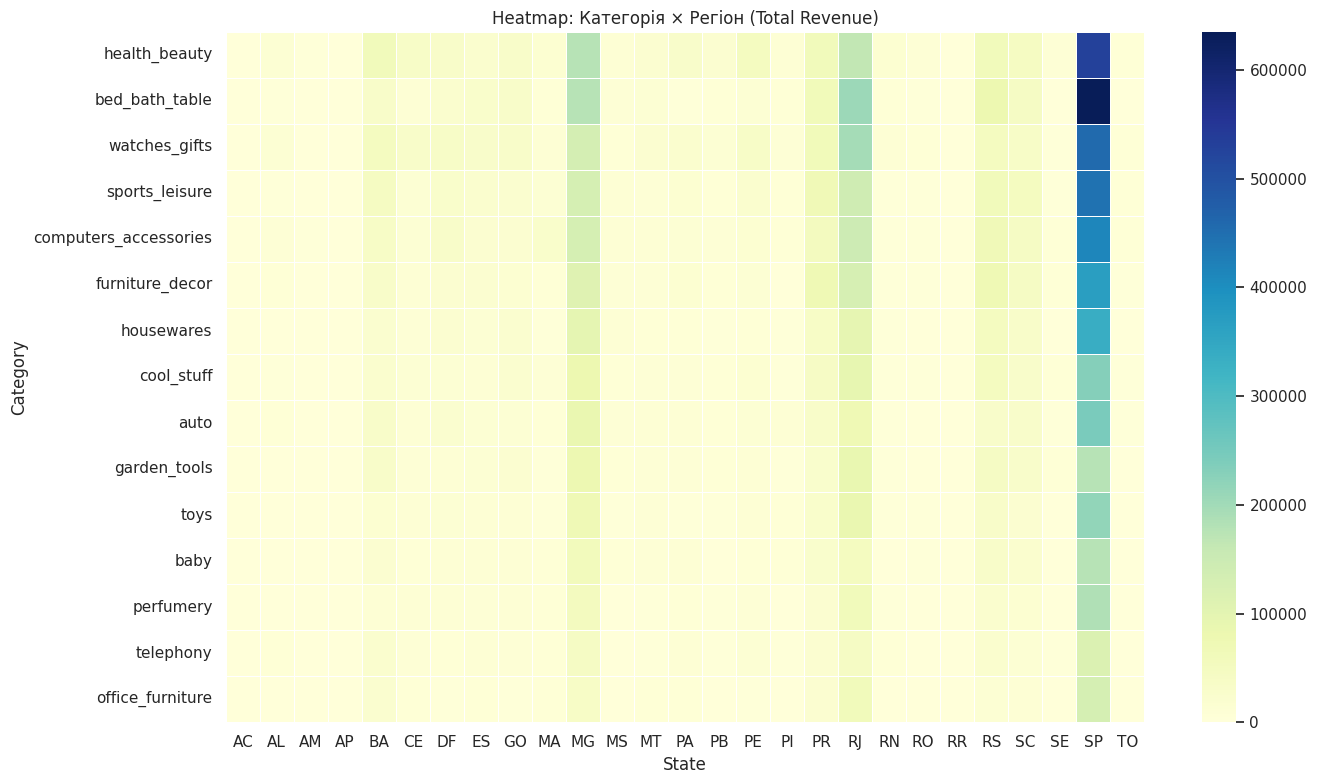

In [30]:
plot_heatmap(df)

In [31]:
top_categories = (
    df.groupby("product_category_name_english")["price"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
)

plot_bar_plotly(
    df_plot=top_categories,
    x_col="price",
    y_col="product_category_name_english",
    title="💰 Найприбутковіші категорії",
    orientation='h',
    color="price",  # додає градієнт
    color_scale="Viridis"
)

In [32]:
revenue_states = (
    df.groupby("customer_state")["payment_value"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

plot_bar_plotly(
    df_plot=revenue_states,
    x_col="payment_value",
    y_col="customer_state",
    title="📍 Прибуток по регіонах",
    orientation='h',
    color="payment_value",
    color_scale="Magma"
)


Number of unique clients:

In [33]:
len(df['customer_id'].unique())

96478

In [34]:
cs = df.groupby("customer_state")['customer_id']

In [35]:
cs

In [36]:
customers_by_state = (
    df.groupby("customer_state")["customer_id"]
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
)

plot_bar_plotly(
    df_plot=customers_by_state,
    x_col="customer_id",
    y_col="customer_state",
    title="🌎 Розподіл клієнтів по регіонах",
    orientation='h',
    color="customer_id",
    color_scale="Blues"
)

In [37]:
df.sort_values(by='order_purchase_timestamp',ascending=False)
lst = df.groupby('customer_id').agg(
    lst_b = ('order_purchase_timestamp',max),
    number_orders = ('order_id',len),
    ord_value = ('payment_value',sum)
)

/tmp/ipython-input-37-1901865340.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.

/tmp/ipython-input-37-1901865340.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [38]:
snapshot_date = df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

In [39]:
rfm = df.groupby('customer_id').agg({
    "order_purchase_timestamp" : lambda x: (snapshot_date-x.max()).days ,
    "order_id" : "nunique" ,
    "price" : "sum"
}).reset_index()

In [40]:
rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary"]

In [41]:
rfm_scaled = rfm[["Recency", "Frequency", "Monetary"]].copy()
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_scaled)

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
rfm["RFM_cluster"] = kmeans.fit_predict(rfm_scaled)

In [43]:
cluster_summary = (
    rfm.groupby("RFM_cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .round(1)
    .sort_values("Monetary", ascending=False)
)
print(cluster_summary)

             Recency  Frequency  Monetary
RFM_cluster                              
2              240.6        1.0     998.2
3               87.5        1.0     106.6
1              457.9        1.0     104.6
0              255.0        1.0     102.6


In [44]:
fig = px.scatter_3d(
    rfm,
    x="Recency", y="Frequency", z="Monetary",
    color="RFM_cluster",
    opacity=0.7,
    title="RFM-кластеризація клієнтів",
    color_continuous_scale="Plasma"
)

fig.update_layout(scene=dict(
    xaxis_title='Recency (днів)',
    yaxis_title='Frequency (замовлень)',
    zaxis_title='Monetary (сума)'
))

fig.show()

| Кластер                             | Опис                        |
| ----------------------------------- | --------------------------- |
|  Високий Monetary + часті покупки | VIP-клієнти                 |
|  Високий Recency                   | давно не замовляли |
|  Низький Monetary                 | Нові або одноразові         |
|  Часті, але мало витрачають       | Потенціал для апсейлу       |


In [45]:
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])


In [46]:
rfm["RFM_Score"] = rfm["R_score"].astype(int) + rfm["F_score"].astype(int) + rfm["M_score"].astype(int)

In [47]:
def segment_customer(score):
    if score >= 13:
        return 'Gold'
    elif score >= 10:
        return 'Silver'
    elif score >= 7:
        return 'Bronze'
    else:
        return 'Lost'

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customer)


In [48]:
rfm["Segment"].value_counts()

,count
Segment,
Bronze,39950
Silver,32935
Lost,15690
Gold,7903


In [49]:
df['review_score'].value_counts()

,count
review_score,
5.0,58281
4.0,19379
1.0,10335
3.0,8307
2.0,3201


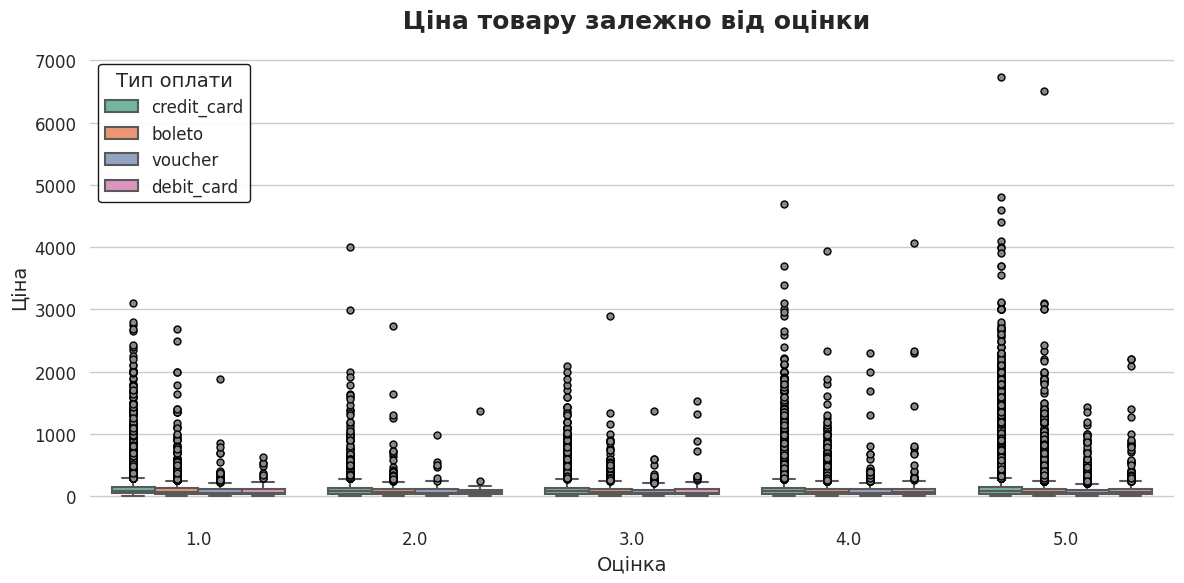

In [50]:
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(
    x="review_score", y="price", hue="payment_type", data=df,
    palette="Set2", linewidth=1.5, flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "#888888", "markeredgecolor": "black"}
)

plt.title(" Ціна товару залежно від оцінки", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Оцінка", fontsize=14)
plt.ylabel("Ціна", fontsize=14)
plt.legend(title="Тип оплати", fontsize=12, title_fontsize=14, loc="upper left", edgecolor="black", framealpha=0.9)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

/tmp/ipython-input-71-4068454866.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




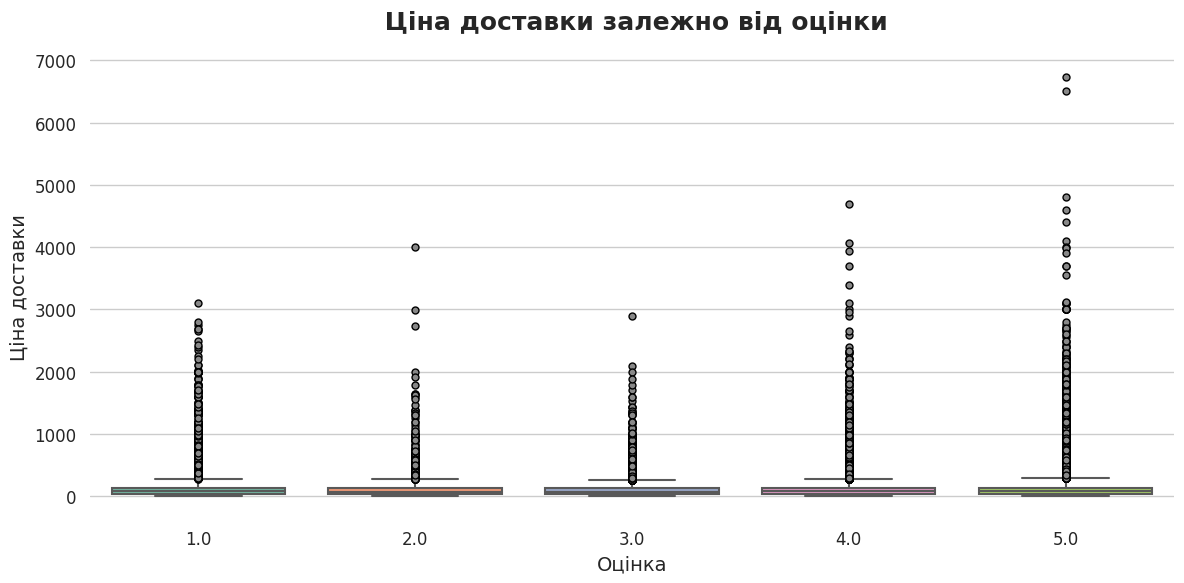

In [71]:
plt.figure(figsize=(12, 6), dpi=100)
sns.boxplot(
    x="review_score", y="price", data=df,
    palette="Set2", linewidth=1.5, flierprops={"marker": "o", "markersize": 5, "markerfacecolor": "#888888", "markeredgecolor": "black"}
)

plt.title(" Ціна доставки залежно від оцінки", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Оцінка", fontsize=14)
plt.ylabel("Ціна доставки", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

The most expensive goods are most often paid for by credit card.

User ratings correlate poorly with the price of the goods.

In [72]:
corr_df = df[["price", "freight_value", "review_score", "payment_value"]].copy()

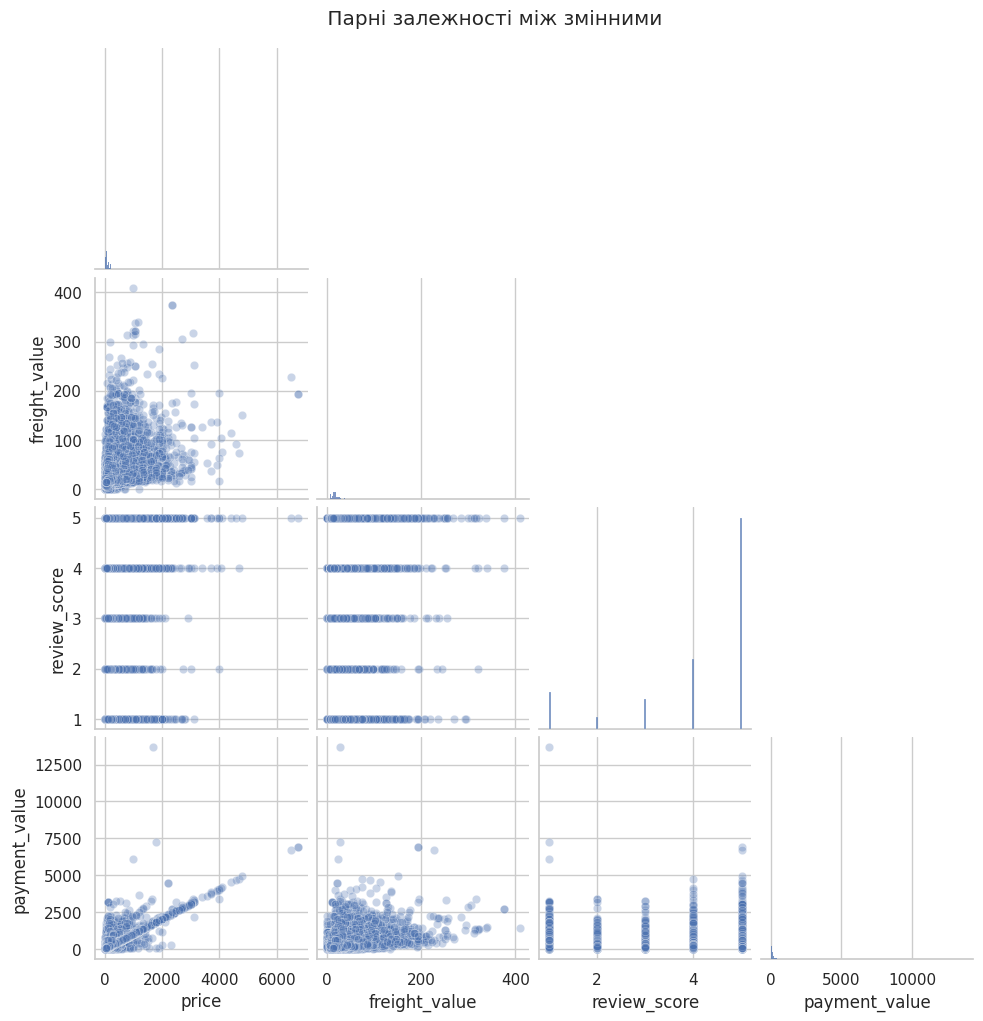

In [53]:
sns.pairplot(corr_df, corner=True, kind="scatter", plot_kws={"alpha": 0.3})
plt.suptitle(" Парні залежності між змінними", y=1.02)
plt.show()

In [54]:
df["month"] = df["order_purchase_timestamp"].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["season"] = df["month"].apply(get_season)


In [55]:
avg_by_season = (
    df.groupby("season")["payment_value"]
    .mean()
    .reindex(["Winter", "Spring", "Summer", "Fall"])
    .reset_index()
)

fig = px.bar(avg_by_season, x="season", y="payment_value", title="Середній чек по сезонах")
fig.show()


AOV is highest in spring and autumn, lowest in winter and summer.

In [56]:
max_by_season = (
    df.groupby("season")["payment_value"]
    .max()
    .reindex(["Winter", "Spring", "Summer", "Fall"])
    .reset_index()
)

fig = px.bar(max_by_season, x="season", y="payment_value", title="Максимальний чек по сезонах")
fig.show()

In [63]:
avg_order_value_by_category = (
    df.groupby("product_category_name_english")["payment_value"]
    .mean()
    .sort_values(ascending=False)
)

top_avg_check = avg_order_value_by_category.reset_index()

fig = px.bar(
    top_avg_check,
    x="payment_value",
    y="product_category_name_english",
    orientation="h",
    title="💳 AOV for categories (Top 15)",
    labels={"payment_value": "Avg Order Value", "product_category_name_english": "Category"},
    color="payment_value",
    color_continuous_scale="Plasma"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [62]:
avg_review_value_by_category = (
    df.groupby("product_category_name_english")["review_score"]
    .mean()
    .sort_values(ascending=False)
)

top_avg_review = avg_review_value_by_category.reset_index()

fig = px.bar(
    top_avg_review,
    x="review_score",
    y="product_category_name_english",
    orientation="h",
    title="💳 Avegare review score for categories",
    labels={"review_score": "Review score", "product_category_name_english": "Category"},
    color="review_score",
    color_continuous_scale="Plasma"
)

fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [66]:
top_avg_review[top_avg_review['product_category_name_english'] == 'small_appliances_home_oven_and_coffee']

,product_category_name_english,review_score
5,small_appliances_home_oven_and_coffee,4.438356


The security and services category has a fairly high average check, but the worst reviews. Small_appliances_home_oven_and_coffee is the category that brings in the most profit, with an average rating of 4.44.